In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [5]:
wine = pd.read_csv('winequalityN.csv')

In [97]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [98]:
#Limpieza de valores
wine.isnull().sum()/len(wine)

type                    0.000000
fixed acidity           0.001539
volatile acidity        0.001231
citric acid             0.000462
residual sugar          0.000308
chlorides               0.000308
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.001385
sulphates               0.000616
alcohol                 0.000000
quality                 0.000000
dtype: float64

In [99]:
#Elimino las filas con valores nulos, porque no son ni el 1% de la data(en este caso)
wine1=wine.dropna()

In [100]:
wine1.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [101]:
#Porcentaje de data eliminada
1-wine1.shape[0]/wine.shape[0]

0.005233184546713843

In [102]:
wine1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [103]:
wine1.loc[:,['type']].value_counts()/wine1.shape[0]

type 
white    0.75352
red      0.24648
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x13cb9c5be50>,
 'caps': [<matplotlib.lines.Line2D at 0x13cb9c6a430>,
 'boxes': [<matplotlib.lines.Line2D at 0x13cb9c5bb80>],
 'medians': [<matplotlib.lines.Line2D at 0x13cb9c6a9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13cb9c6aca0>],
 'means': []}

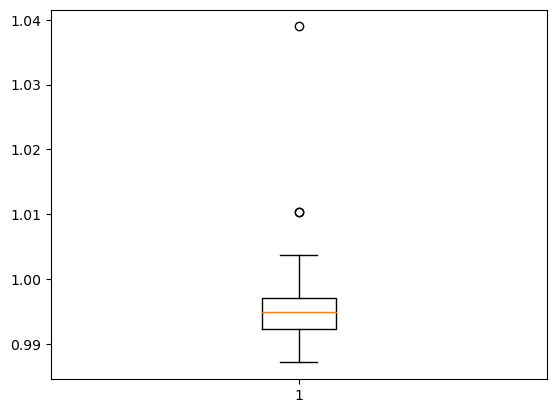

In [104]:
#Trabajable
plt.boxplot(wine1['density'])

{'whiskers': [<matplotlib.lines.Line2D at 0x13cb9cc0970>,
 'caps': [<matplotlib.lines.Line2D at 0x13cb9cc0f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x13cb9cc0670>],
 'medians': [<matplotlib.lines.Line2D at 0x13cb9cd14f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13cb9cd17c0>],
 'means': []}

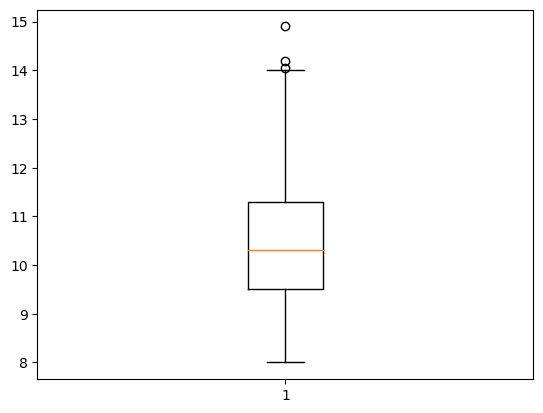

In [105]:
plt.boxplot(wine1['alcohol'])

In [107]:
wine1['alcohol']=np.where(wine1['alcohol']>14,wine1['alcohol'].mean(),wine1['alcohol'])
wine1['density']=np.where(wine1['density']>=1.01,wine1['density'].mean(),wine1['density'])

C:\Users\usuario\AppData\Local\Temp\ipykernel_16780\1288052497.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\usuario\AppData\Local\Temp\ipykernel_16780\1288052497.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'whiskers': [<matplotlib.lines.Line2D at 0x13cb9dcf400>,
 'caps': [<matplotlib.lines.Line2D at 0x13cb9dcf9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13cb9dcf130>],
 'medians': [<matplotlib.lines.Line2D at 0x13cb9dcff40>],
 'fliers': [<matplotlib.lines.Line2D at 0x13cb9ddd250>],
 'means': []}

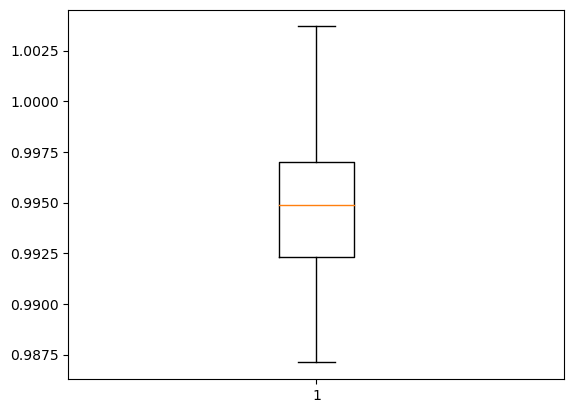

In [108]:
plt.boxplot(wine1['density'])

{'whiskers': [<matplotlib.lines.Line2D at 0x13cb9f5cbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x13cb9dfc1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13cb9f5c910>],
 'medians': [<matplotlib.lines.Line2D at 0x13cb9dfc760>],
 'fliers': [<matplotlib.lines.Line2D at 0x13cb9dfca30>],
 'means': []}

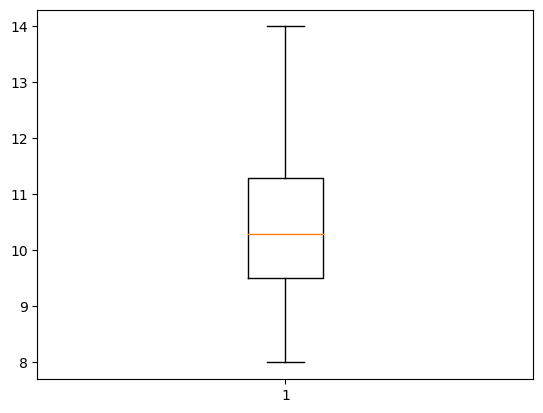

In [109]:
plt.boxplot(wine1['alcohol'])

In [110]:
wine1

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<AxesSubplot:xlabel='type', ylabel='alcohol'>

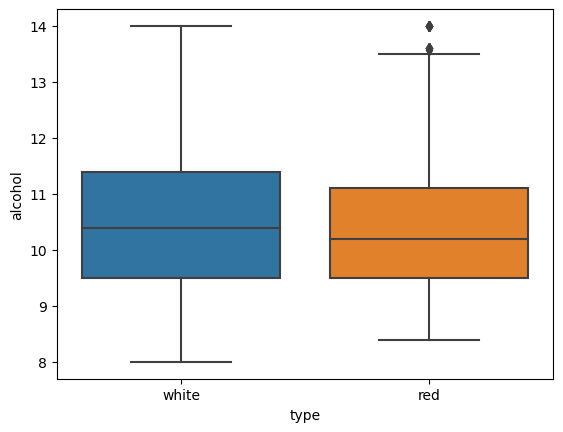

In [111]:

sns.boxplot(data=wine1, x='type', y='alcohol')

In [112]:
wine_white=wine1.loc[wine1['type']=='white']
wine_red=wine1.loc[wine1['type']=='red']

In [113]:
wine_w=wine_white.loc[ : ,['density','pH','alcohol','fixed acidity','citric acid']].copy()
wine_r=wine_red.loc[ : ,['density','pH','alcohol','fixed acidity','citric acid']].copy()
wine_n=wine1.loc[ : ,['density','pH','alcohol','fixed acidity','citric acid','residual sugar']].copy()

In [114]:
x= wine_w['alcohol']
y=wine_w['density']
x1= wine_r['alcohol']
y1=wine_r['density']


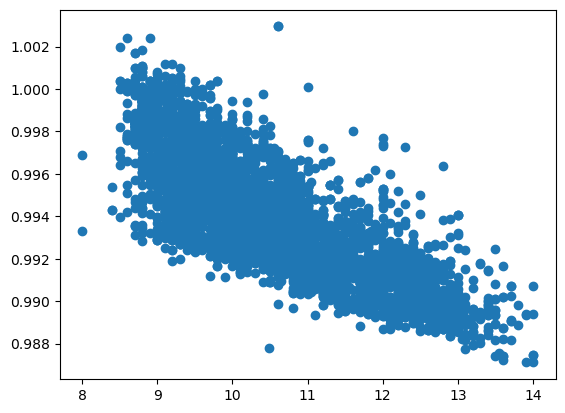

In [115]:
plt.scatter(x,y)

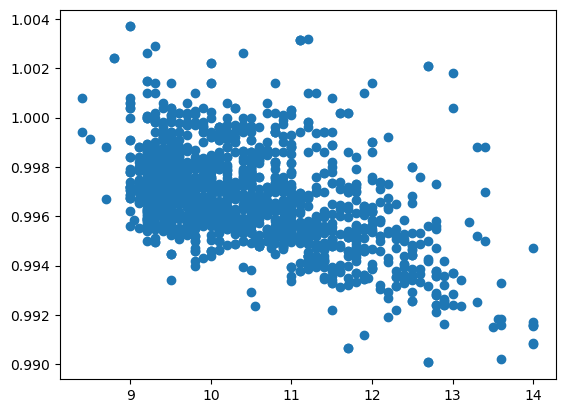

In [116]:
plt.scatter(x1,y1)

In [117]:
w=wine_w.corr()
r=wine_r.corr()

In [118]:
#VINO BLANCO
wine_w.corr()

,density,pH,alcohol,fixed acidity,citric acid
density,1.000000,-0.098854,-0.803826,0.267404,0.149072
pH,-0.098854,1.000000,0.121494,-0.424343,-0.161527
alcohol,-0.803826,0.121494,1.000000,-0.120989,-0.074845
fixed acidity,0.267404,-0.424343,-0.120989,1.000000,0.287439
citric acid,0.149072,-0.161527,-0.074845,0.287439,1.000000


In [119]:
#VINO ROJO
wine_r.corr()

,density,pH,alcohol,fixed acidity,citric acid
density,1.000000,-0.341517,-0.498710,0.667893,0.364505
pH,-0.341517,1.000000,0.212269,-0.681961,-0.540704
alcohol,-0.498710,0.212269,1.000000,-0.070939,0.107361
fixed acidity,0.667893,-0.681961,-0.070939,1.000000,0.671009
citric acid,0.364505,-0.540704,0.107361,0.671009,1.000000


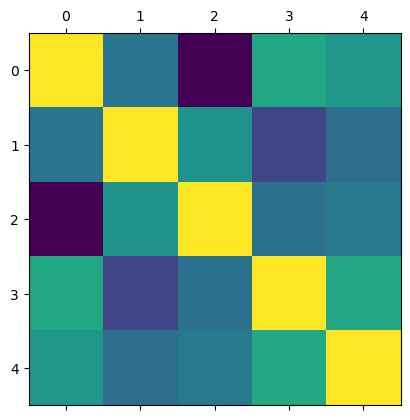

In [120]:
#VINO BLANCO
plt.matshow(w)

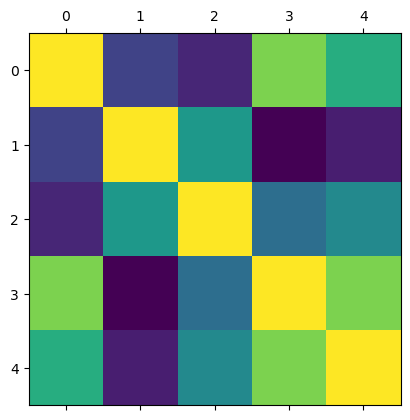

In [121]:
#VINO ROJO
plt.matshow(r)

In [122]:
#CONCLUSION PCA: Para las columnas que estoy analizando en este casi no es muy relevante separarlos dado que
#Ambos tienen una correlacion negativa en cuanto a densidad vs alcohol trata por lo se tiene el mismo comoportamiento 


In [123]:
available_columns=['density','alcohol','fixed acidity','citric acid','pH']
#available_columns=['residual sugar','density','alcohol','fixed acidity','pH']

In [124]:
wn=wine1.loc[ : , available_columns].values

In [125]:
wn

array([[ 1.001  ,  8.8    ,  7.     ,  0.36   ,  3.     ],
       [ 0.994  ,  9.5    ,  6.3    ,  0.34   ,  3.3    ],
       [ 0.9951 , 10.1    ,  8.1    ,  0.4    ,  3.26   ],
       ...,
       [ 0.99574, 11.     ,  6.3    ,  0.13   ,  3.42   ],
       [ 0.99547, 10.2    ,  5.9    ,  0.12   ,  3.57   ],
       [ 0.99549, 11.     ,  6.     ,  0.47   ,  3.39   ]])

In [126]:
wn=StandardScaler().fit_transform(wn)

In [127]:
wn

array([[ 2.14951144, -1.42095352, -0.16778609,  0.2839587 , -1.35916011],
       [-0.23353806, -0.8327477 , -0.70715516,  0.14625658,  0.50839916],
       [ 0.14094114, -0.32857128,  0.67979387,  0.55936296,  0.25939126],
       ...,
       [ 0.35881996,  0.42769335, -0.70715516, -1.29961576,  1.25542287],
       [ 0.26690233, -0.24454188, -1.01536606, -1.36846682,  2.18920251],
       [ 0.27371105,  0.42769335, -0.93831333,  1.0413204 ,  1.06866695]])

In [128]:
wn=np.around(wn,2)

In [129]:
np.nan_to_num(wn)

array([[ 2.15, -1.42, -0.17,  0.28, -1.36],
       [-0.23, -0.83, -0.71,  0.15,  0.51],
       [ 0.14, -0.33,  0.68,  0.56,  0.26],
       ...,
       [ 0.36,  0.43, -0.71, -1.3 ,  1.26],
       [ 0.27, -0.24, -1.02, -1.37,  2.19],
       [ 0.27,  0.43, -0.94,  1.04,  1.07]])

In [130]:
pca=PCA(n_components=2)

In [131]:
principalComponents=pca.fit_transform(wn)

In [132]:
pcadf=pd.DataFrame(data=principalComponents, columns=['col1','col2'])

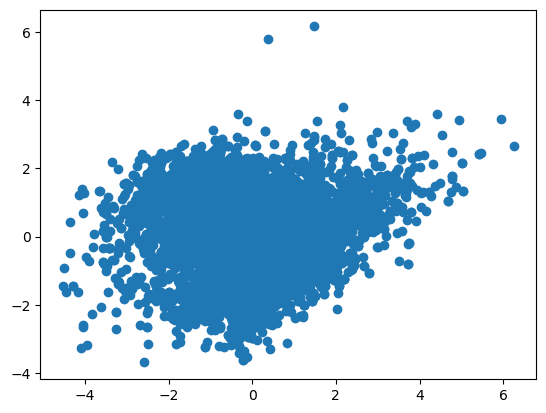

In [133]:
plt.scatter(pcadf['col1'],pcadf['col2'])

In [134]:
km=KMeans(n_clusters=3).fit(pcadf)

In [135]:
km.cluster_centers_

array([[ 1.54569388,  0.40898332],
       [-1.27448419,  0.86097036],
       [-0.0792645 , -1.1244651 ]])

In [136]:
cetroids=km.cluster_centers_

In [137]:
km.labels_

array([0, 2, 0, ..., 2, 2, 2])

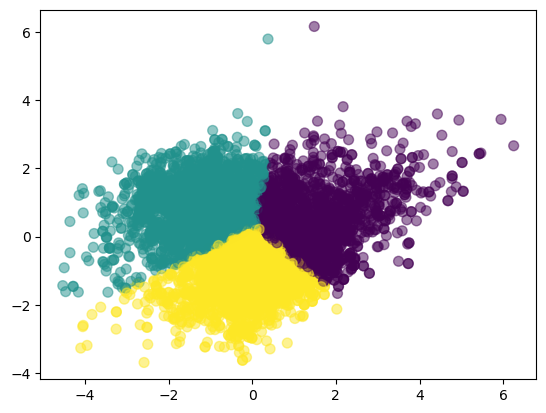

In [138]:
plt.scatter(pcadf['col1'],pcadf['col2'],c=km.labels_.astype(float), s=50, alpha=0.5)

In [139]:
wine_n['cluster']=km.labels_

In [140]:
wine_n

,density,pH,alcohol,fixed acidity,citric acid,residual sugar,cluster
0,1.00100,3.00,8.8,7.0,0.36,20.7,0
1,0.99400,3.30,9.5,6.3,0.34,1.6,2
2,0.99510,3.26,10.1,8.1,0.40,6.9,0
3,0.99560,3.19,9.9,7.2,0.32,8.5,2
4,0.99560,3.19,9.9,7.2,0.32,8.5,2
...,...,...,...,...,...,...,...
6491,0.99651,3.42,9.5,6.8,0.08,1.9,2
6492,0.99490,3.45,10.5,6.2,0.08,2.0,2
6494,0.99574,3.42,11.0,6.3,0.13,2.3,2
6495,0.99547,3.57,10.2,5.9,0.12,2.0,2


In [141]:
wine_n.loc[wine_n['cluster']==0 , :].describe()

,density,pH,alcohol,fixed acidity,citric acid,residual sugar,cluster
count,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.0
mean,0.997017,3.121833,9.806506,8.272846,0.430240,7.462272,0.0
std,0.002083,0.123649,0.850751,1.612420,0.137755,5.479468,0.0
min,0.991600,2.720000,8.400000,5.600000,0.110000,0.600000,0.0
25%,0.995545,3.040000,9.200000,7.100000,0.320000,2.200000,0.0
50%,0.997200,3.120000,9.500000,7.800000,0.420000,6.800000,0.0
75%,0.998390,3.200000,10.300000,9.100000,0.490000,12.100000,0.0
max,1.003690,3.580000,13.400000,15.900000,1.660000,31.600000,0.0


In [142]:
wine_n.loc[wine_n['cluster']==1 , :].describe()

,density,pH,alcohol,fixed acidity,citric acid,residual sugar,cluster
count,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2181.0
mean,0.991543,3.197785,11.713041,6.722536,0.328308,3.544865,1.0
std,0.001527,0.142531,0.859048,0.821804,0.097766,3.126980,0.0
min,0.987110,2.790000,9.500000,3.900000,0.000000,0.700000,1.0
25%,0.990450,3.100000,11.100000,6.200000,0.280000,1.500000,1.0
50%,0.991510,3.200000,11.600000,6.700000,0.320000,2.300000,1.0
75%,0.992540,3.290000,12.400000,7.200000,0.370000,4.900000,1.0
max,0.997300,3.720000,14.000000,9.600000,1.230000,65.800000,1.0


In [143]:
wine_n.loc[wine_n['cluster']==2 , :].describe()

,density,pH,alcohol,fixed acidity,citric acid,residual sugar,cluster
count,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.0
mean,0.995696,3.315336,9.918824,6.820448,0.219763,5.560921,2.0
std,0.001842,0.148532,0.720978,0.768386,0.116266,4.676225,0.0
min,0.990760,2.930000,8.000000,3.800000,0.000000,0.700000,2.0
25%,0.994400,3.200000,9.400000,6.300000,0.140000,1.900000,2.0
50%,0.995700,3.300000,9.800000,6.800000,0.240000,3.000000,2.0
75%,0.996900,3.410000,10.400000,7.300000,0.300000,8.100000,2.0
max,1.002410,4.010000,13.100000,9.900000,0.740000,20.800000,2.0


In [144]:
loadings=pca.components_.T*np.sqrt(pca.explained_variance_)

In [145]:
loadings

array([[ 0.84180231, -0.44014844],
       [-0.70164986,  0.51809214],
       [ 0.69100644,  0.30006709],
       [ 0.43167656,  0.66608085],
       [-0.38584023, -0.61983549]])

In [146]:
fig=px.scatter(principalComponents,x=0,y=1,color=wine_n['cluster'])

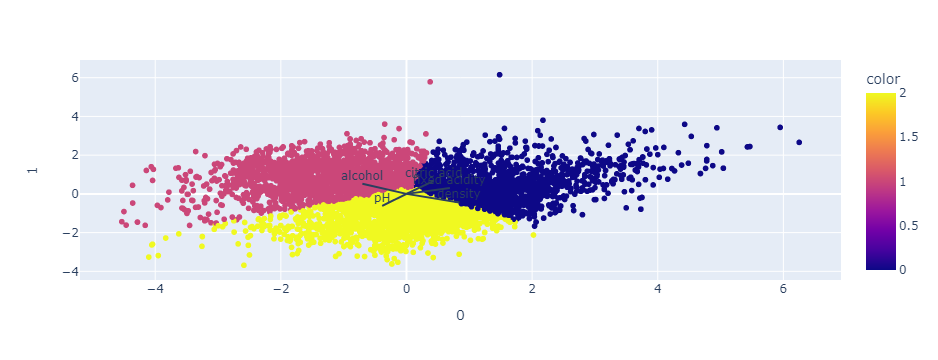

In [147]:
for i, feature in enumerate(available_columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i,0],
        y1=loadings[i,1],
    )
    fig.add_annotation(
        x=loadings[i,0],
        y=loadings[i,1],
        ax=0,ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
    
fig.show()

In [ ]:
#Tipos de vino
#El Suave(Azul): Este tipo de vino va orientado a los que les gusta sentir el sabor frutal anejado dado que tiene mas
#                azucar residual de la fruta y con un toque acido al final por la fermentacion de la misma, es por eso 
#                que es el que tiene mas acido citrico.Orientado a las personas que disfrutan el sabor puro y catadores
#                dado a su grado de fermentacion. 

#El fuerte(Rojo): Este contiene menos azucar residual y acido citrico, pero con una carga mas alta de alcohol, por lo que
#                 sus clientes finales son los consumidores que cuenten con una mayor resistencia al alcohol 
#                  o les guste embriagarse con el vino.

#Balanceado(Amarillo): Este posee lo mejor de ambos mundos, un toque dulce y una carga de alcohol moderada. Sus clientes finales
#                      serian los que toman vino eventualmente en eventos y celebraciones.

In [148]:
wine_n

,density,pH,alcohol,fixed acidity,citric acid,residual sugar,cluster
0,1.00100,3.00,8.8,7.0,0.36,20.7,0
1,0.99400,3.30,9.5,6.3,0.34,1.6,2
2,0.99510,3.26,10.1,8.1,0.40,6.9,0
3,0.99560,3.19,9.9,7.2,0.32,8.5,2
4,0.99560,3.19,9.9,7.2,0.32,8.5,2
...,...,...,...,...,...,...,...
6491,0.99651,3.42,9.5,6.8,0.08,1.9,2
6492,0.99490,3.45,10.5,6.2,0.08,2.0,2
6494,0.99574,3.42,11.0,6.3,0.13,2.3,2
6495,0.99547,3.57,10.2,5.9,0.12,2.0,2


In [149]:
wine1

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [150]:
wine2=wine1.drop(columns=['density','alcohol','fixed acidity','citric acid','pH'])

In [151]:
wine2

,type,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,quality
0,white,0.270,20.7,0.045,45.0,170.0,0.45,6
1,white,0.300,1.6,0.049,14.0,132.0,0.49,6
2,white,0.280,6.9,0.050,30.0,97.0,0.44,6
3,white,0.230,8.5,0.058,47.0,186.0,0.40,6
4,white,0.230,8.5,0.058,47.0,186.0,0.40,6
...,...,...,...,...,...,...,...,...
6491,red,0.620,1.9,0.068,28.0,38.0,0.82,6
6492,red,0.600,2.0,0.090,32.0,44.0,0.58,5
6494,red,0.510,2.3,0.076,29.0,40.0,0.75,6
6495,red,0.645,2.0,0.075,32.0,44.0,0.71,5


In [152]:
wine2['respond']=np.where(wine2['quality']>=5,1,0)

In [153]:
wine2

,type,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,quality,respond
0,white,0.270,20.7,0.045,45.0,170.0,0.45,6,1
1,white,0.300,1.6,0.049,14.0,132.0,0.49,6,1
2,white,0.280,6.9,0.050,30.0,97.0,0.44,6,1
3,white,0.230,8.5,0.058,47.0,186.0,0.40,6,1
4,white,0.230,8.5,0.058,47.0,186.0,0.40,6,1
...,...,...,...,...,...,...,...,...,...
6491,red,0.620,1.9,0.068,28.0,38.0,0.82,6,1
6492,red,0.600,2.0,0.090,32.0,44.0,0.58,5,1
6494,red,0.510,2.3,0.076,29.0,40.0,0.75,6,1
6495,red,0.645,2.0,0.075,32.0,44.0,0.71,5,1


In [154]:
wine2=wine2.drop(columns=['quality','type'])

In [155]:
wine2

,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,respond
0,0.270,20.7,0.045,45.0,170.0,0.45,1
1,0.300,1.6,0.049,14.0,132.0,0.49,1
2,0.280,6.9,0.050,30.0,97.0,0.44,1
3,0.230,8.5,0.058,47.0,186.0,0.40,1
4,0.230,8.5,0.058,47.0,186.0,0.40,1
...,...,...,...,...,...,...,...
6491,0.620,1.9,0.068,28.0,38.0,0.82,1
6492,0.600,2.0,0.090,32.0,44.0,0.58,1
6494,0.510,2.3,0.076,29.0,40.0,0.75,1
6495,0.645,2.0,0.075,32.0,44.0,0.71,1


In [156]:
###############################################Regresion logisitica###########################################################
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve

In [157]:

features_col = wine2.columns.values[0:8]

In [158]:
X = wine2[features_col].values
y = wine2["respond"].values

In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.25, random_state=0)

In [160]:
log_model = LogisticRegression(solver='lbfgs', max_iter=8000)
log_model.fit(X_train,Y_train)

LogisticRegression(max_iter=8000)

In [161]:
y_pred  = log_model.predict(X_test)

In [162]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [163]:
Y_test

array([1, 1, 1, ..., 1, 1, 1])

In [164]:
log_model.predict_proba(X_test)[:] 

array([[0.00197352, 0.99802648],
       [0.0015752 , 0.9984248 ],
       [0.00202758, 0.99797242],
       ...,
       [0.00217656, 0.99782344],
       [0.00150471, 0.99849529],
       [0.0016143 , 0.9983857 ]])

In [165]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)

Text(0.5, 427.9555555555555, 'Etiqueta de prediccion')

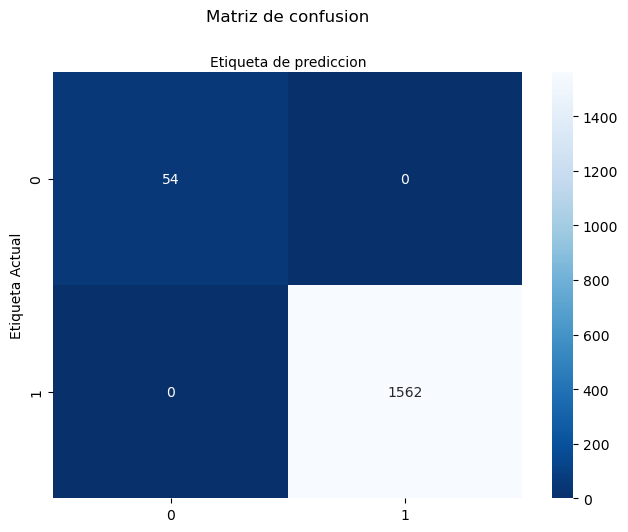

In [166]:

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")

In [167]:
print(metrics.accuracy_score(Y_test,y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

1.0
1.0
1.0
1.0


In [168]:
#Mhm o tuve suerte o hay algo malo pero no creo que sea normal que de 100% :/
metrics.roc_auc_score(Y_test, y_pred)

1.0

In [169]:
########################################Neuronal Network####################################################################

from sklearn.neural_network import MLPClassifier


In [170]:
x_train = X_train 
x_test = X_test
y_train = Y_train
y_test =  Y_test 

In [171]:
# Making the Neural Network Classifier
NN = MLPClassifier(random_state=1, max_iter=3000)

# Training the model on the training data and labels
NN.fit(x_train, y_train)

# Testing the model i.e. predicting the labels of the test data.
y_pred = NN.predict(x_test)

# Evaluating the results of the model
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

In [172]:
print(metrics.accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

1.0
1.0
1.0
1.0


In [173]:
###############################################Arbol de decisiones##################################
from sklearn import tree


In [174]:
tree_one = tree.DecisionTreeClassifier(random_state=1)

In [175]:
tree_one = tree_one.fit( x_train , y_train )

In [176]:
tree_one.tree_.max_depth

1

In [177]:
y_pred = tree_one.predict(x_test)

In [178]:
print(metrics.accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

1.0
1.0
1.0
1.0


In [179]:
##############################################Random Forest######################################################################

In [180]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train , y_train);

In [181]:
y_pred = rf.predict(x_test) >= 0.80

In [182]:
print(metrics.accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

1.0
1.0
1.0
1.0


Segun el dataset de wine, realice las siguientes actividades:
- Limpie las variables numericas. (evalue primero si vale la pena estretificar por type), en caso de existir valores atipicos remplece por la media.
- Aplique PCA utilizando maximo 5 columnas (evalue si el PCA vale la pena hacer uno para white y otro para red)
    - No se debe de usar quality para este ejercicio
- Una ves tenga el PCA, aplique un algoritmo de k-means para crear tres perfiles del vino. (explique que significa cada perfil)
- Agregue la nueva variable al dateset y elimine las columnas que hayan formado parte de analisis del PCA, tanto para white como para red, en caso que hayan sido entrenamientos distintos.
- Crea la varible de respuesta de la siguiente manera:
    - if quality >= 5 ? 1 else 0
- Elimine la variable quality del dataset
- Aplique los siguientes entrenamientos de MLS (evalue primero si vale la pena estretificar por type):
    - Regresion Logistica
    - NN
    - Aroboles de desiciones
    - Random Forest
- Explique cual de los entrenamientos fue el mejor?

In [ ]:
#Por alguna razon todos los entrenamiento me dan un 100% de precision en todo, realmente no se si se debe a la falta
#de baja calidad osea quality<=4 o simplemente lo tengo todo malo, pero aparentemente todos funcionaron bien.